**классификатор текстов CharCNN**

Евгений Борисов <esborisov@sevsu.ru>

## Данные

In [1]:
import pandas as pd
import numpy as np
import numpy.random as rng
from tqdm.notebook import tqdm
tqdm.pandas()        
pd.options.display.max_colwidth = 200 

In [2]:
ff = ['id', 'tdate', 'tmane', 'ttext', 'ttype', 'trep', 'tfav', 'tstcount', 'tfol', 'tfrien', 'listcount','unk']

data = pd.concat([
    pd.read_csv('data/positive.csv.gz',sep=';',header=None),
    pd.read_csv('data/negative.csv.gz',sep=';',header=None),
])

data.columns = ff

data = data[['id','ttext', 'ttype']]

print( 'negative:', len(data.query('ttype==-1')), '\npositive:',len(data.query('ttype==1')) )

data.sample(10)

negative: 111923 
positive: 114911


,id,ttext,ttype
107314,424235476334436353,"@Mo_OnMery крч, день прошёл самый обычный.",-1
70907,417889328317341696,"RT @sofibars: сегодня до вечера готовлю все сама,первый раз в жизни,так грустно(",-1
32321,409747818866151426,"@filius_satan а я то как:ооо как что у тебя?:з как учеба, жизнь, всё?:)",1
73820,410626239322656768,"RT @pucirulifac: Знающие люди, подскажите как самостоятельно русифицировать Nokia 6350. Привезли из оттуда )) уже разлоченный от At&amp;amp;T.",1
26102,409571918145404928,"Бля чуваки \nЯ проснулся и зашел в тс,а там пиздец \nГрядет новая борода)))))))))000\nЭльки нет давно уже \nЭто странно",1
44132,414330062318469121,"обидно, когда человек не понимает, что от него хотят((( а еще обиднее когда это непонимание растягивается в несколько месяцев 3-(",-1
23801,411940216090664960,"Ребята простите что засрала ленту, ну просто эт мой любимый фильм :(\nСорики &lt;3",-1
5133,409775550077894656,"@nastasya_i @nastmilash Я снова чувствую как рушится мой гениальный план..((( Рахманинааа, визы лишней нет?:В мне срочно!!!",-1
19081,411480293326209024,За гол все кардинально поменялось. В лучшую сторону (,-1
70691,410470693688848384,@erised_h оу и как? О чем вы там написали? Поля еаписала свою статью?),1


### очистка данных

In [3]:
import re

In [4]:
# применяет список замен pat к строке s
def replace_patterns(s,pat):
    if len(pat)<1: return s
    return  replace_patterns( re.sub(pat[0][0],pat[0][1],s), pat[1:] )

# нормализация текста
def string_normalizer(s):
    pat = [
      [r'[ёЁ]','е'] # замена ё для унификации
      #,[r'</?[a-z]+>',' '] # удаляем xml
      ,[r'[:;]-*[)D]',' радость ']
      ,[r'\)\)\)*',' радость ']
      ,[r'[:;]\*',' поцелуй ']
      ,[r':\(',' печаль ']
      ,[r'\(\(\(*',' печаль ']
      #,[r'\d+',' digit ']
    ]
    return replace_patterns(s,pat).strip()

In [5]:
data['ttext_'] = data['ttext'].progress_apply(string_normalizer)

  0%|          | 0/226834 [00:00<?, ?it/s]

In [6]:
import re
from nltk.tokenize import word_tokenize as nltk_tokenize_word

In [7]:
def tokenize(line): # разбиваем предложения на слова
    return    [ 
        t.lower() 
        for t in nltk_tokenize_word(line) 
        if re.match(r'[a-zа-я]+',t.lower()) # выкинуть слова не содержащие букв
        # if re.match(r'[а-я -]+',t.lower()) and len(t)>1 
        # if not( (t.lower() in stopwords) or (len(t)<3) ) 
    ] 

In [8]:
data['ttext_'] = data['ttext_'].progress_apply(tokenize)

  0%|          | 0/226834 [00:00<?, ?it/s]

In [9]:
data.sample(10)

,id,ttext,ttype,ttext_
76247,410696469750894592,Немного утреннего позитива ! ))) http://t.co/ETzwg3ynAU,1,"[немного, утреннего, позитива, радость, http]"
63788,410352523229540352,@podobedovakatya спасибо) вот этим и займусь. Пошла пить таблеткиии. Как они меня достали уже...,1,"[podobedovakatya, спасибо, вот, этим, и, займусь, пошла, пить, таблеткиии, как, они, меня, достали, уже]"
76930,410703427375595520,"И ваще политика была не по плану! Должен был быть футбол! У него все строго по регламенту: 1) музыка, 2) кино, 3) футбол и 4) политика!",1,"[и, ваще, политика, была, не, по, плану, должен, был, быть, футбол, у, него, все, строго, по, регламенту, музыка, кино, футбол, и, политика]"
91956,422028547905974272,"Если бы мир был другим, я бы давно ушел путешествовать и следовал бы к какой-нибудь огромной мечте :|",-1,"[если, бы, мир, был, другим, я, бы, давно, ушел, путешествовать, и, следовал, бы, к, какой-нибудь, огромной, мечте]"
96179,411023001485058048,"@i_zemler я знаю, но для вашего бестселлера это только эпизод ))) ф",1,"[i_zemler, я, знаю, но, для, вашего, бестселлера, это, только, эпизод, радость, ф]"
11135,410630871700742144,#ХочуПровестиНовогоднююНочьВместеС @Ekaterinaa33 @ElenaSolov_98 @edwardlololo @ALU_DiReCtIoNeR @Dashulya6969 @Do_or_die_azaz @luda_1D,-1,"[хочупровестиновогоднююночьвместес, ekaterinaa33, elenasolov_98, edwardlololo, alu_directioner, dashulya6969, do_or_die_azaz, luda_1d]"
20413,411580350134226944,Белякова испортила легендарную песню((( Градский не подумал прежде чем ей песню выбирать #голос,-1,"[белякова, испортила, легендарную, песню, печаль, градский, не, подумал, прежде, чем, ей, песню, выбирать, голос]"
80919,410750788584374272,"@Podlesetskaya думаю это и не есть проблемой, просто никак определиться не можешь, что именно тебе нужно)",1,"[podlesetskaya, думаю, это, и, не, есть, проблемой, просто, никак, определиться, не, можешь, что, именно, тебе, нужно]"
15248,409346799183613952,"RT @wigekydidika: Формат улыбки зависит не только от настроения, но и от форм зубов))",1,"[rt, wigekydidika, формат, улыбки, зависит, не, только, от, настроения, но, и, от, форм, зубов, радость]"
109637,424585597853106177,Он так плакал когда я уезжал (( http://t.co/CzlSTZZLgQ,-1,"[он, так, плакал, когда, я, уезжал, печаль, http]"


In [10]:
# максимальная длинна последовательности
seq_max_len = data['ttext_'].str.len().max() 
seq_max_len

36

In [11]:
# максимальная длинна слова
word_max_len = data['ttext_'].progress_apply(lambda s: max([ len(w) for w in s])).max()
word_max_len

  0%|          | 0/226834 [00:00<?, ?it/s]

136

In [12]:
# data[ data['ttext_'].str.len()<1 ] # пустые последовательности

In [13]:
print( 'negative:', len(data.query('ttype==-1')), '\npositive:',len(data.query('ttype==1')) )

negative: 111923 
positive: 114911


In [14]:
data = data[ data['ttext_'].str.len()>0 ].reset_index(drop=True)
print( 'negative:', len(data.query('ttype==-1')), '\npositive:',len(data.query('ttype==1')) )

negative: 111923 
positive: 114911


------

In [15]:
abc = set.union(*[ set(' '.join(s)) for s in data['ttext_'].apply(set) ])
abc = { w:n+1 for n,w in enumerate(sorted(abc)) }
# abc_len = len(abc)
# abc_len
len(abc)

197

In [16]:
# дополняем до максимальной длины
def pad_seq(s,max_len,pad_code=0):
    return [pad_code]*(max_len-len(s))+s

# заменяем символы слова на последовательность номеров символов в алфавите 
def encode_abc(w,abc=abc ): 
    return list(map(abc.get,w))

def encode_abc_bin(codes,abc_len=len(abc)):
    return [ np.eye(abc_len,dtype=np.uint8)[c] for c in codes ]

def encode_seq(s, abc=abc, seq_max_len=seq_max_len, word_max_len=word_max_len, ):
    abc_len = len(abc)+1
    zero_word = np.zeros(abc_len,dtype=np.uint8) 
    zero_seq = np.zeros([1,word_max_len,abc_len],dtype=np.uint8) 
    return np.vstack(
        pad_seq( # дополняем последовательности до единого размера
            [ 
                np.vstack(
                    pad_seq( # дополняем код слова до единого размера
                        encode_abc_bin( encode_abc(w,abc=abc), abc_len=abc_len, ) # кодируем слово
                        ,word_max_len # максимальный размер слова
                        ,pad_code=zero_word # дополняем нулями
                    )
                )[np.newaxis,:]
                for w in s # для каждого слова последовательности
            ]
            ,seq_max_len # максимальный размер последовательности
            ,pad_code=zero_seq # дополняем нулями
        )
    )[np.newaxis,:]

# [ номер примера, позиция слова в предложении, позиция символа в слове, номер символа ]

In [17]:
def get_batch(df,batch_size=10_000,shuffle=True,):
    ii = rng.permutation(len(df)) if shuffle else np.array(range(len(df)))
    for i in range(0,len(ii),batch_size):
        yield (
            np.vstack( df.iloc[ii[i:i+batch_size]]['ttext_'].apply(encode_seq).values ), 
            # строим выход нейросети (из 2 нейронов)
            np.eye(2,dtype=np.float32)[(df.iloc[ii[i:i+batch_size]]['ttype'].values+1)//2],
        )

# x,target = next( get_batch(data,batch_size=1_000) )
# x.shape, target.shape

----

In [18]:
ii = rng.permutation(len(data))
n = len(data)//10
data_train  = data.iloc[ii[:n]].reset_index(drop=True)
data_test  = data.iloc[ii[n:]].reset_index(drop=True)

In [19]:
print('train:\n')
print('\tnegative:', len(data_train.query('ttype==-1')), '\n\tpositive:',len(data_train.query('ttype==1')) )

print('test:\n')
print('\tnegative:', len(data_test.query('ttype==-1')), '\n\tpositive:',len(data_test.query('ttype==1')) )

train:

	negative: 11152 
	positive: 11531
test:

	negative: 100771 
	positive: 103380


## модель

In [20]:
# del model
# del y

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [22]:
torch.__version__

'1.10.2+cu102'

In [24]:
n_classes = 2

class Model(nn.Module):
    def __init__(self, 
                 output_dim=n_classes, # размер выхода
                ):
        super().__init__()
        
        self._conv1= nn.Conv2d(
                in_channels=seq_max_len,
                out_channels=32,
                kernel_size=(15,15)
            )
        self._linear = nn.Linear(3072, output_dim) # выходной (линейный) слой

    def forward(self,x):
        o = self._conv1(x)
        # o = F.relu(o)
        o = F.tanh(o)
        o = F.max_pool2d(o,kernel_size=15)
        o = torch.flatten(o, start_dim=1)
        o = self._linear(o) # считаем выход сети
        o = F.softmax(o,dim=1)
        
        return o 

In [25]:
model = Model()
model

Model(
  (_conv1): Conv2d(36, 32, kernel_size=(15, 15), stride=(1, 1))
  (_linear): Linear(in_features=3072, out_features=2, bias=True)
)

In [27]:
# x,y = next( get_batch(data,batch_size=100) )
# model( torch.tensor( x, dtype=torch.float32 ) ).shape
# del x
# del y

torch.Size([100, 2])

### обучаем модель

In [29]:
# проверяем GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [30]:
model = model.to(device)

In [31]:
criterion =  nn.CrossEntropyLoss() # ф-ция потери
optimizer = torch.optim.Adam(model.parameters(), lr=.005) # метод оптимизации

In [36]:
%%time

batch_size=128
loss_history = [] # значения ф-ции потери
n_epoch = 10 # количество эпох обучения

for i in range(n_epoch): 
    print('epoch:',i+1)
    for x,y in tqdm(
            get_batch(data_train,batch_size=batch_size)
            ,total=len(data_train)//batch_size
        ): # получаем батч учебных примеров
        x_ = torch.tensor(x,dtype=torch.float32).to(device)
        y_ = torch.tensor(y,dtype=torch.float32).to(device)
        out = model.forward(x_) # считаем выход модели
        loss = criterion(y_,out ) # вычисляем значение ф-ции потери
        loss_history.append(loss.item()) # дополняем историю изменения значений ф-ции потери
        optimizer.zero_grad() # очищаем предыдущее значение градиента
        loss.backward()  # вычисляем текущее значение градиента ф-ции потери
        optimizer.step() # корректируем параметры модели
        del x_
        del y_
    torch.cuda.empty_cache()
    #acc_history.append( accuracy(data_train) ) #значение погрешности

epoch: 1


  0%|          | 0/177 [00:00<?, ?it/s]

epoch: 2


  0%|          | 0/177 [00:00<?, ?it/s]

epoch: 3


  0%|          | 0/177 [00:00<?, ?it/s]

epoch: 4


  0%|          | 0/177 [00:00<?, ?it/s]

epoch: 5


  0%|          | 0/177 [00:00<?, ?it/s]

CPU times: user 11min 37s, sys: 2min 24s, total: 14min 2s
Wall time: 11min 17s


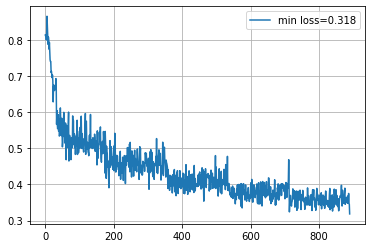

In [37]:
from matplotlib import pyplot as plt
# история изменения значений ф-ции потери
plt.plot(loss_history,label='min loss=%.3f'%(min(loss_history)))
plt.grid()
plt.legend()

## проверяем результат

In [43]:
# batch_size = 128

with torch.set_grad_enabled(False):
    o_test = np.hstack([
            np.argmax( model(torch.tensor(x,dtype=torch.float32).to(device)).cpu().numpy(),axis=1 )
            for x,_ in tqdm(
                    get_batch( data_test, batch_size=batch_size, shuffle=False)
                    ,total=len(data_test)//batch_size
                )
        ])
    
target_test = (data_test['ttype']+1)//2  

from sklearn.metrics import classification_report
print(classification_report( target_test,o_test))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83    100771
           1       0.83      0.84      0.84    103380

    accuracy                           0.83    204151
   macro avg       0.83      0.83      0.83    204151
weighted avg       0.83      0.83      0.83    204151



----

In [32]:
# from sklearn.metrics import accuracy_score

# def accuracy(dataset,batch_size=128):
#     with torch.set_grad_enabled(False):
#         return np.mean([
#             accuracy_score(
#                 y[:,1],
#                 np.argmax( model(torch.tensor(x,dtype=torch.float32).to(device)).cpu().numpy(),axis=1 )
#             )
#             for x,y in tqdm(
#                     get_batch( dataset, batch_size=batch_size, shuffle=False)
#                     ,total=len(dataset)//batch_size
#                 )
#         ])
        
# # acc_history = [ accuracy(data_train) ] # начальное значение погрешности

In [33]:
# acc_history

In [ ]:
# acc_history

In [ ]:
# # история изменения значений погрешности модели
# plt.plot(acc_history,label='max acc=%.3f'%(max(acc_history)),c='r')
# plt.grid()
# plt.legend()

In [ ]:
# x,y = next( get_batch(data,batch_size=100) )
# x.shape, y.shape

In [ ]:
# o = nn.Conv2d(
#         in_channels=seq_max_len,
#         out_channels=128,
#         kernel_size=(7,7)
#     )(torch.tensor(x,dtype=torch.float32))

# o = F.max_pool2d(o,kernel_size=5)

# o = nn.Conv2d(
#         in_channels=128,
#         out_channels=32,
#         kernel_size=(9,9)
#     )(o)

# o = F.max_pool2d(o,kernel_size=3)

# print(o.shape)

# o = torch.flatten(o, start_dim=1)

# o.shape

In [ ]:
# max_pool2d(input, kernel_size, stride=None, padding=0, dilation=1,

In [23]:
# x,y = next( get_batch(data,batch_size=100) )
# # x.shape, y.shape
#
# o = nn.Conv2d(
#         in_channels=seq_max_len,
#         out_channels=32,
#         kernel_size=(15,15)
#     )(torch.tensor(x,dtype=torch.float32))
#
# o = F.max_pool2d(o,kernel_size=15)
#
# # o = nn.Conv2d(
# #         in_channels=128,
# #         out_channels=32,
# #         kernel_size=(9,9)
# #     )(o)
#
# # o = F.max_pool2d(o,kernel_size=3)
#
# print(o.shape)
#
# o = torch.flatten(o, start_dim=1)
#
# o.shape